In [1]:
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.style.use('default')
# plt.style.use('dark_background')
%matplotlib inline

In [89]:
whiskey = pd.read_csv('./Scraping/Scraped_Data/master_whiskey.csv', encoding='latin1')

# droping f's and no reviews
whiskey = whiskey[(whiskey['grade'] != 'f') & (whiskey['grade'] != 'No Grade')].copy()

# droping blank reviews
whiskey['review'].dropna(inplace=True)

In [5]:
whiskey.head()

,username,grade,review,w_name,bottler,age,w_type,vint,subtype,abv,region,price,avaib,url
0,Ries,b,n: fuller rich nose; full vanilla caramels van...,Aberlour 12 Year Old Non Chill-filtered,Aberlour,12 yrs,Scotch,NaN,Single Malt,48.0,Speyside,50,Wide,http://www.lawhiskeysociety.com/whiskey-profil...
1,Andy,bminus,n: Gym socks across the room p: Wierd. Grea...,Aberlour 12 Year Old Non Chill-filtered,Aberlour,12 yrs,Scotch,NaN,Single Malt,48.0,Speyside,50,Wide,http://www.lawhiskeysociety.com/whiskey-profil...
2,Andy,bplus,p: Candied plums and mint. The batches are of...,Aberlour A'bunadh Batch 46,OB,NaN,Scotch,NaN,Single Malt,60.4,Highland,65,Better Stores,http://www.lawhiskeysociety.com/whiskey-profil...
3,Fuji,bminus,Semi sweet chocolate and red berries. I get m...,Aberlour A'bunadh Batch 46,OB,NaN,Scotch,NaN,Single Malt,60.4,Highland,65,Better Stores,http://www.lawhiskeysociety.com/whiskey-profil...
4,Fuji,b,N: Ceral oats christmas cinnamon raisin raspbe...,Aberlour A'bunadh Batch 47,OB,NaN,Scotch,NaN,Single Malt,60.7,Speyside,65,Wide,http://www.lawhiskeysociety.com/whiskey-profil...


In [10]:
whiskey['username'].value_counts()

Andy         235
Fuji          75
Ries          61
Sku           32
Dan           15
Adam           4
Ryan           2
Chris          2
Josh           2
Kevin          1
FussyChkn      1
Name: username, dtype: int64

In [11]:
whiskey['grade'].value_counts()

b           134
bminus       86
cplus        66
bplus        63
c            31
cminus       25
aminus       15
dplus         5
d             2
a             1
No Grade      1
f             1
Name: grade, dtype: int64

In [18]:
whiskey.shape

(430, 14)

In [31]:
whiskey = whiskey[(whiskey['grade'] != 'f') & (whiskey['grade'] != 'No Grade')].copy()

In [24]:
grade_replacement = {'a': 5, 'aminus': 4.5, 'bplus': 4.25, 'b': 4, 'bminus': 3.5, 'cplus': 3.25, 'c': 3, 'cminus': 2.5, 'dplus': 2.25, 'd': 2, 'dminus': 1.5}

In [30]:
whiskey['grade'] = whiskey['grade'].map(grade_replacement)

In [70]:
whiskey['grade'].value_counts().sort_index()

2.00      2
2.25      5
2.50     25
3.00     31
3.25     66
3.50     86
4.00    134
4.25     63
4.50     15
5.00      1
Name: grade, dtype: int64

<Container object of 10 artists>

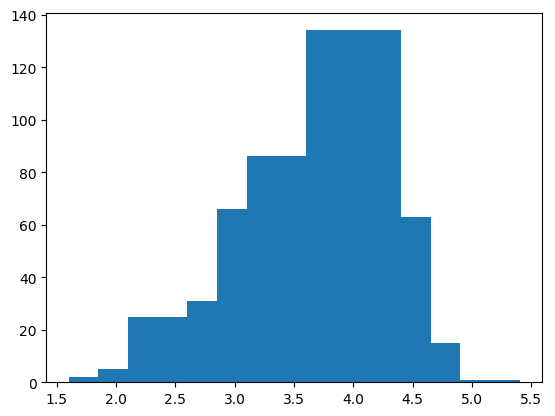

In [69]:
plt.bar(x=whiskey['grade'].value_counts().index, height=whiskey['grade'].value_counts(), align='center')

In [100]:
# whiskey's with more than one review
sum(whiskey['w_name'].value_counts() > 1)

125

In [75]:
whiskey.head()

,username,grade,review,w_name,bottler,age,w_type,vint,subtype,abv,region,price,avaib,url
0,Ries,4.00,n: fuller rich nose; full vanilla caramels van...,Aberlour 12 Year Old Non Chill-filtered,Aberlour,12 yrs,Scotch,NaN,Single Malt,48.0,Speyside,50,Wide,http://www.lawhiskeysociety.com/whiskey-profil...
1,Andy,3.50,n: Gym socks across the room p: Wierd. Grea...,Aberlour 12 Year Old Non Chill-filtered,Aberlour,12 yrs,Scotch,NaN,Single Malt,48.0,Speyside,50,Wide,http://www.lawhiskeysociety.com/whiskey-profil...
2,Andy,4.25,p: Candied plums and mint. The batches are of...,Aberlour A'bunadh Batch 46,OB,NaN,Scotch,NaN,Single Malt,60.4,Highland,65,Better Stores,http://www.lawhiskeysociety.com/whiskey-profil...
3,Fuji,3.50,Semi sweet chocolate and red berries. I get m...,Aberlour A'bunadh Batch 46,OB,NaN,Scotch,NaN,Single Malt,60.4,Highland,65,Better Stores,http://www.lawhiskeysociety.com/whiskey-profil...
4,Fuji,4.00,N: Ceral oats christmas cinnamon raisin raspbe...,Aberlour A'bunadh Batch 47,OB,NaN,Scotch,NaN,Single Malt,60.7,Speyside,65,Wide,http://www.lawhiskeysociety.com/whiskey-profil...


In [82]:
whiskey[whiskey['review'].isnull()]

,username,grade,review,w_name,bottler,age,w_type,vint,subtype,abv,region,price,avaib,url
72,Fuji,3.50,NaN,Bunnahabhain 1973 Archives,Archives,40 yrs,Scotch,1973.0,Single Malt,50.6,Islay,270,Overseas Specialty,http://www.lawhiskeysociety.com/whiskey-profil...
197,Fuji,4.50,NaN,Glenlivet 1981 Signatory K&L,Signatory,33 yrs,Scotch,1981.0,Single Malt,51.1,Speyside,400,Specialty Stores,http://www.lawhiskeysociety.com/whiskey-profil...
245,Fuji,3.25,NaN,Kilkerran Sherry Wood,OB,NaN,Scotch,NaN,Single Malt,46.0,Campbeltown,50,Better Stores,http://www.lawhiskeysociety.com/whiskey-profil...
254,Fuji,4.00,NaN,Laphroaig 16 for TWE,OB,16 yrs,Scotch,NaN,Single Malt,50.6,Islay,180,Overseas Specialty,http://www.lawhiskeysociety.com/whiskey-profil...
329,Fuji,4.00,NaN,North British 1964 Sovereign,Hunter Laing,50 yrs,Scotch,1964.0,Grain,44.7,Lowland,250,Specialty Stores,http://www.lawhiskeysociety.com/whiskey-profil...
367,Fuji,3.50,NaN,Springbank 25,OB,25 yrs,Scotch,NaN,Single Malt,46.0,Campbeltown,600,Wide,http://www.lawhiskeysociety.com/whiskey-profil...


In [87]:
whiskey['review'].dropna(inplace=True)

In [101]:
whiskey.head()

,username,grade,review,w_name,bottler,age,w_type,vint,subtype,abv,region,price,avaib,url
0,Ries,b,n: fuller rich nose; full vanilla caramels van...,Aberlour 12 Year Old Non Chill-filtered,Aberlour,12 yrs,Scotch,NaN,Single Malt,48.0,Speyside,50,Wide,http://www.lawhiskeysociety.com/whiskey-profil...
1,Andy,bminus,n: Gym socks across the room p: Wierd. Grea...,Aberlour 12 Year Old Non Chill-filtered,Aberlour,12 yrs,Scotch,NaN,Single Malt,48.0,Speyside,50,Wide,http://www.lawhiskeysociety.com/whiskey-profil...
2,Andy,bplus,p: Candied plums and mint. The batches are of...,Aberlour A'bunadh Batch 46,OB,NaN,Scotch,NaN,Single Malt,60.4,Highland,65,Better Stores,http://www.lawhiskeysociety.com/whiskey-profil...
3,Fuji,bminus,Semi sweet chocolate and red berries. I get m...,Aberlour A'bunadh Batch 46,OB,NaN,Scotch,NaN,Single Malt,60.4,Highland,65,Better Stores,http://www.lawhiskeysociety.com/whiskey-profil...
4,Fuji,b,N: Ceral oats christmas cinnamon raisin raspbe...,Aberlour A'bunadh Batch 47,OB,NaN,Scotch,NaN,Single Malt,60.7,Speyside,65,Wide,http://www.lawhiskeysociety.com/whiskey-profil...


In [102]:
stop = stopwords.words('english')

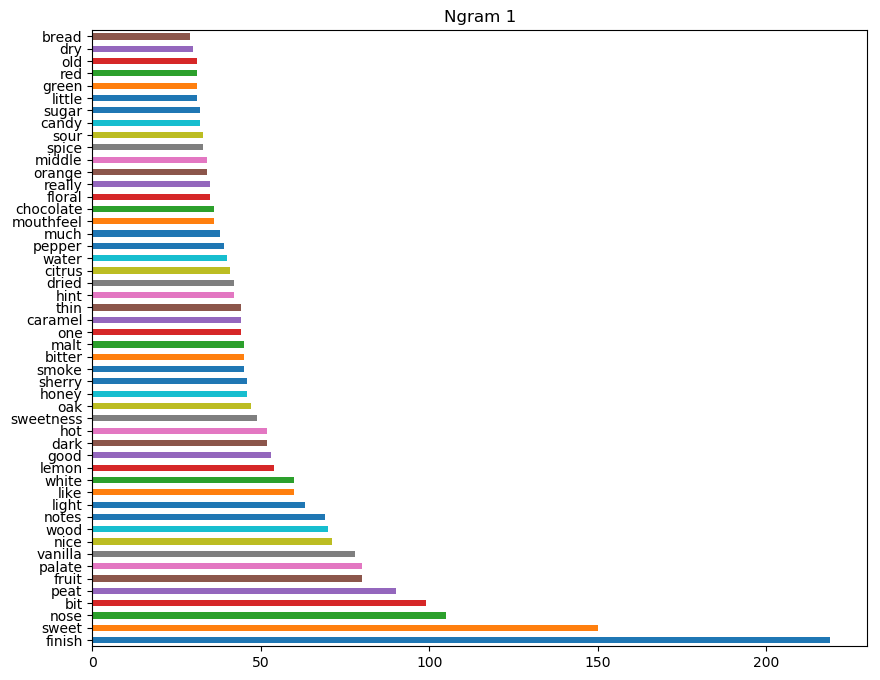

In [103]:
vect = CountVectorizer(ngram_range=(1,1), stop_words=stop)
X = vect.fit_transform(whiskey['review'])

ngram_text = pd.DataFrame(X.toarray(), columns=vect.get_feature_names())

plt.figure(figsize=(10,8))
ngram_text.sum().sort_values(ascending=False).head(50).plot(kind="barh", title='Ngram 1')

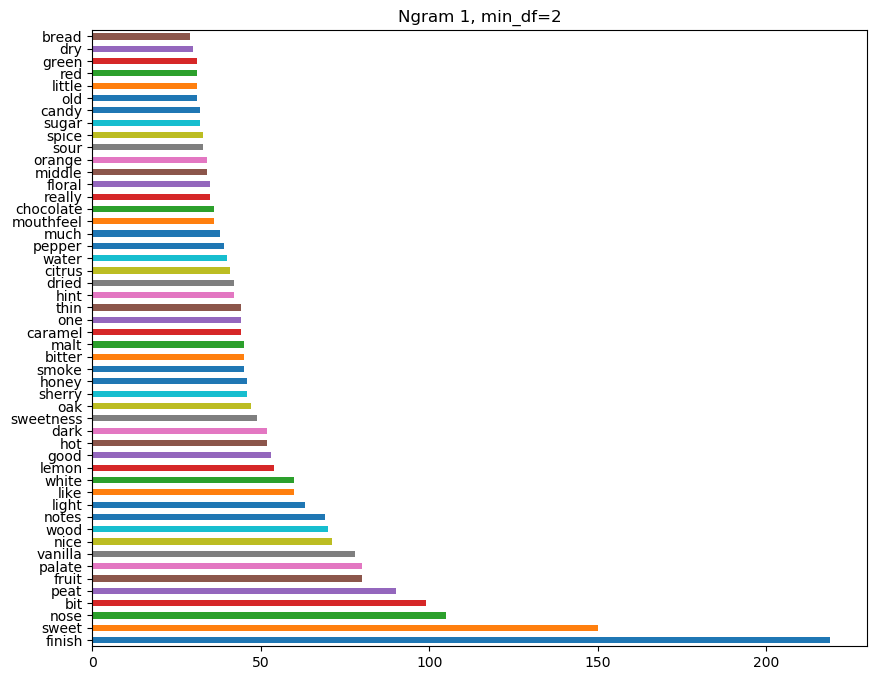

In [104]:
vect = CountVectorizer(ngram_range=(1,1), stop_words=stop, min_df=2)
X = vect.fit_transform(whiskey['review'])

ngram_text = pd.DataFrame(X.toarray(), columns=vect.get_feature_names())

plt.figure(figsize=(10,8))
ngram_text.sum().sort_values(ascending=False).head(50).plot(kind="barh", title='Ngram 1, min_df=2')

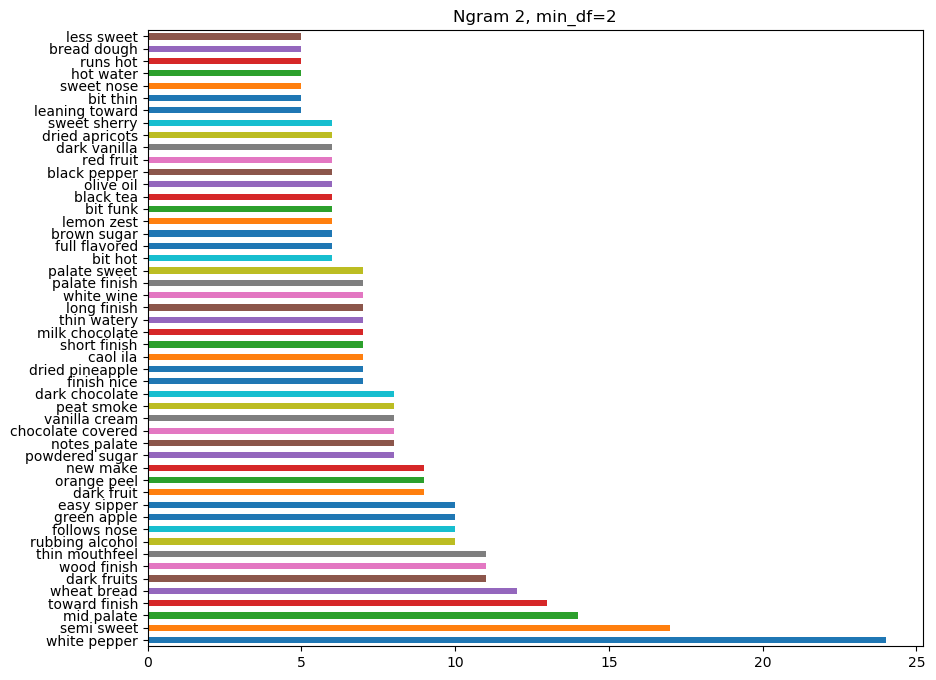

In [105]:
# bigram
vect = CountVectorizer(ngram_range=(2,2), stop_words=stop, min_df=2)
X = vect.fit_transform(whiskey['review'])

ngram_text = pd.DataFrame(X.toarray(), columns=vect.get_feature_names())

plt.figure(figsize=(10,8))
ngram_text.sum().sort_values(ascending=False).head(50).plot(kind="barh", title='Ngram 2, min_df=2')

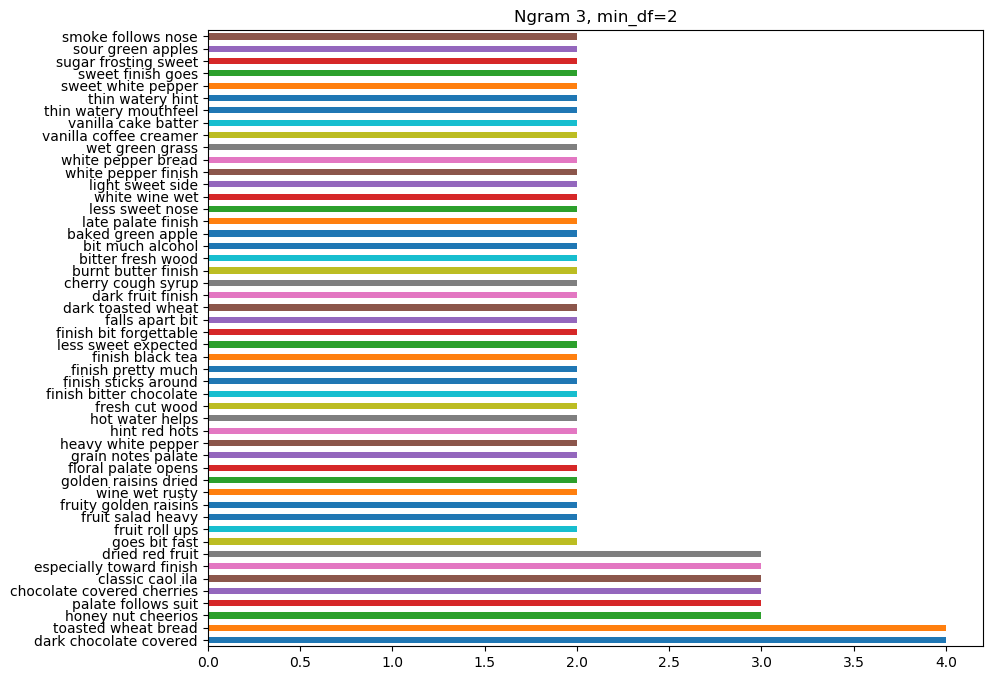

In [106]:
vect = CountVectorizer(ngram_range=(3,3), stop_words=stop, min_df=2)
X = vect.fit_transform(whiskey['review'])

ngram_text = pd.DataFrame(X.toarray(), columns=vect.get_feature_names())

plt.figure(figsize=(10,8))
ngram_text.sum().sort_values(ascending=False).head(50).plot(kind="barh", title='Ngram 3, min_df=2')

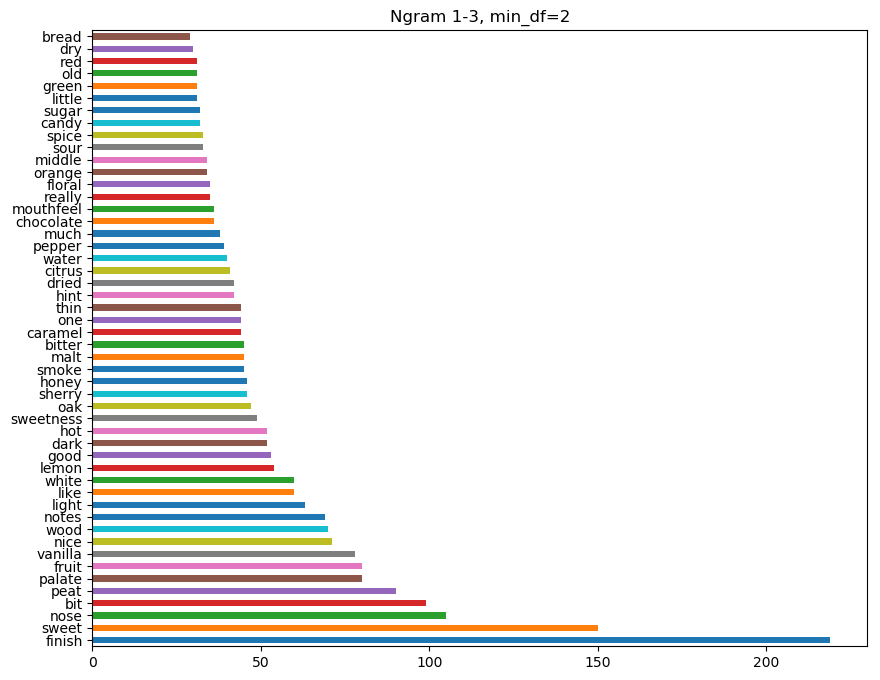

In [107]:
vect = CountVectorizer(ngram_range=(1,3), stop_words=stop, min_df=2)
X = vect.fit_transform(whiskey['review'])

ngram_text = pd.DataFrame(X.toarray(), columns=vect.get_feature_names())

plt.figure(figsize=(10,8))
ngram_text.sum().sort_values(ascending=False).head(50).plot(kind="barh", title='Ngram 1-3, min_df=2')